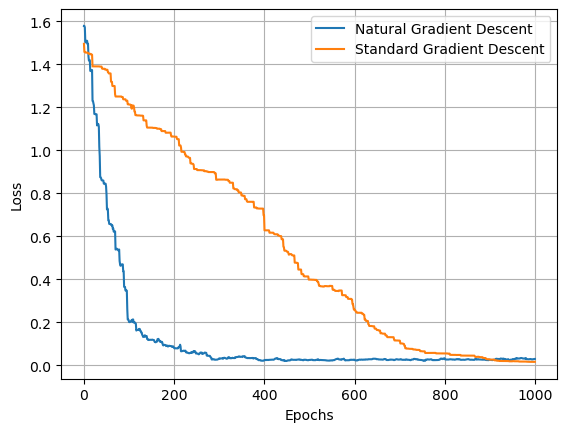

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 1000  # Size of sample
dim_x = 20          # Number of neurons in the input layer
noise_std = 0.1     # Noise variance
learning_rate = 0.1 # Learning rate (assumed constant)
  
w_true = np.random.randn(dim_x)                           # Best weights we want to achieve
x_data = np.random.randn(num_samples, dim_x)              # Input data
noise = np.random.normal(0, noise_std, size=num_samples)  # Random noise

def activation_function(x):
    return np.tanh(x)  

def generate_outputs(x_data, w_true, noise):
    z = activation_function(x_data @ w_true) + noise 
    return z

z_data = generate_outputs(x_data, w_true, noise) # Output data

w_nat = np.random.randn(dim_x)  # Weights initialization for natural gradient
w_std = np.random.randn(dim_x)  # Weights initialization for standard gradient


losses_nat = []    # Initialization of (full) loss function for natural gradient
losses_std = []    # Initialization of (full) loss function for standard gradient

##### On-line Learning Procedure #####
for t in range(num_samples):
    
    x_i = x_data[t]  
    z_i = z_data[t]
    
    ######## Natural Gradient ########
    z_pred_nat = activation_function(x_i @ w_nat)
    error_nat = z_i - z_pred_nat
    loss_nat = 0.5*error_nat**2
    gradient_nat = -error_nat * (1 - z_pred_nat**2) * x_i 
    fisher_matrix = (x_data.T * (1 - z_pred_nat**2)) @ x_data / num_samples                 
    natural_gradient = np.linalg.pinv(fisher_matrix ) @ gradient_nat  
    w_nat -= learning_rate * natural_gradient # Update the parameters
    
    z_pred_full_nat = activation_function(x_data @ w_nat)    # Computation of the output for all the data set 
    losses_nat.append(np.mean((z_data-z_pred_full_nat)**2))  # Full loss

    ######## Standard Gradient ########
    z_pred_std = activation_function(x_i @ w_std)
    error_std = z_i - z_pred_std
    loss_std = 0.5*error_std**2 
    gradient_std = - error_std * (1 - z_pred_std**2) * x_i
    w_std -= learning_rate * gradient_std
    
    z_pred_full_std = activation_function(x_data @ w_std)
    losses_std.append(np.mean((z_data-z_pred_full_std)**2))

##### PLOT #####

t = np.arange(0, num_samples)
plt.plot(t, losses_nat, label="Natural Gradient Descent")
plt.plot(t, losses_std, label="Standard Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
#plt.savefig("loss.png", dpi=300) 
plt.show()


